<a href="https://colab.research.google.com/github/RifatMuhtasim/R_Programming_Language/blob/main/1.06.T_Test_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Sample T-Test

In [ ]:
# Check if the mean value is smaller than 0.3
sal <- c(0.593, 0.142, 0.329, 0.691, 0.231, 0.793, 0.519, 0.392, 0.418)
t.test(sal, alternative = "greater", mu=0.3)


	One Sample t-test

data:  sal
t = 2.2051, df = 8, p-value = 0.02927
alternative hypothesis: true mean is greater than 0.3
95 percent confidence interval:
 0.3245133       Inf
sample estimates:
mean of x 
0.4564444 


In [ ]:
#install.packages("ggplot2")
#install.packages("dplyr")
#install.packages("tidyr")
#install.packages("magrittr")
#install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## Install and run the following library:
library(ggplot2)	# plotting & get default data
library(dplyr)		# data manipulation
library(tidyr)		# data re-shaping
library(magrittr)	# pipe operator
library(gridExtra)	# provides side-by-side plotting


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Question 1:
Let's assume the nationwide average of college educated adults is 32% (Bachelor's degress or higher) and we want to see if the midwest mean is significantly different then the national average; In particular we want to test if the midwest average is less than the national average.

In [ ]:
# midwest data which is Built-in data from ggplot2
data(midwest)
head(midwest)
dim(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


[1] 437  28

In [ ]:
# Summary of the percollege of midwest
names(midwest)
summary(midwest$percollege)

[1] "PID"                  "county"               "state"               
 [4] "area"                 "poptotal"             "popdensity"          
 [7] "popwhite"             "popblack"             "popamerindian"       
[10] "popasian"             "popother"             "percwhite"           
[13] "percblack"            "percamerindan"        "percasian"           
[16] "percother"            "popadults"            "perchsd"             
[19] "percollege"           "percprof"             "poppovertyknown"     
[22] "percpovertyknown"     "percbelowpoverty"     "percchildbelowpovert"
[25] "percadultpoverty"     "percelderlypoverty"   "inmetro"             
[28] "category"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.336  14.114  16.798  18.273  20.550  48.079 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


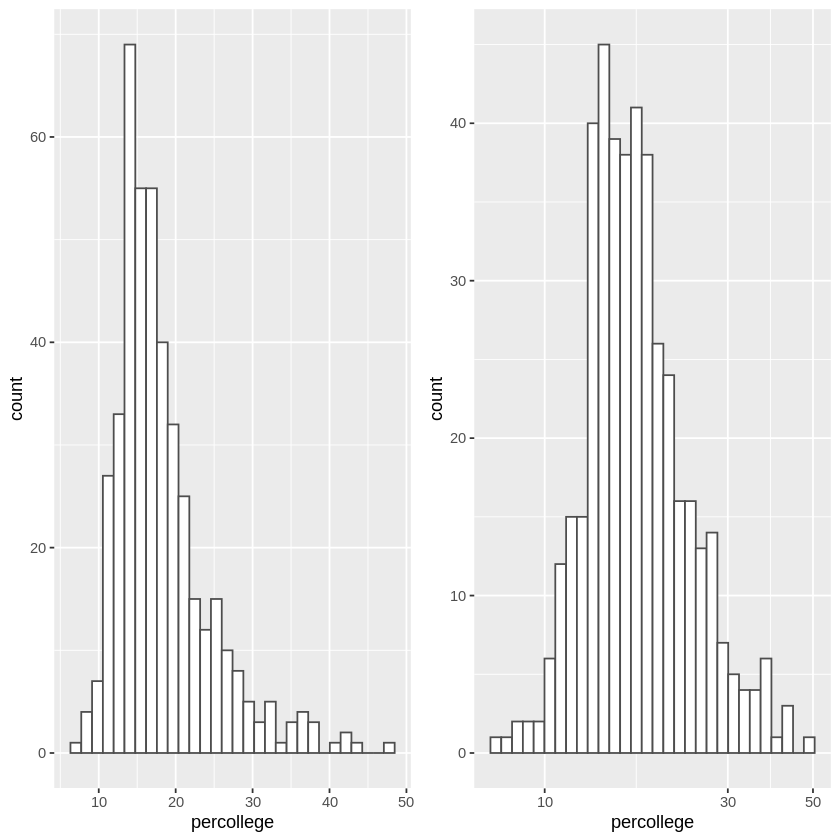

In [ ]:
# Checking normality: Preliminary Idea from observed data and Draw two plot
p1 <- ggplot(midwest, aes(percollege)) + geom_histogram(fill="white", color="grey30")
p2 <- ggplot(midwest, aes(percollege)) + geom_histogram(fill="white", color="grey30") + scale_x_log10()
grid.arrange(p1, p2, ncol=2)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


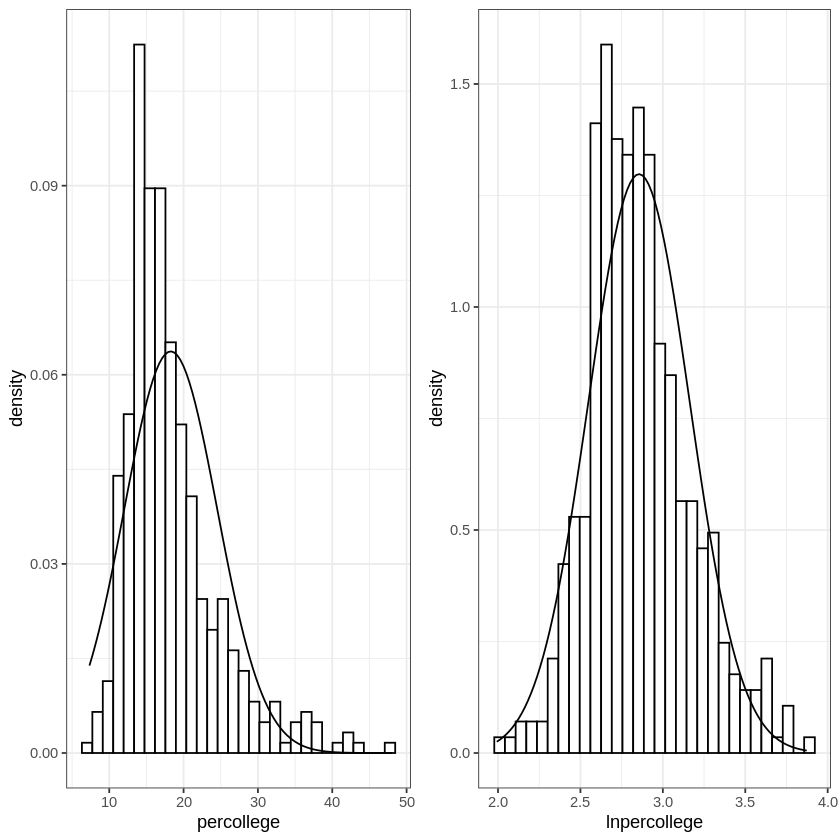

In [ ]:
# Checking normality: Alternative (Based on observed data & probability function)
p1 <- ggplot(midwest, aes(x = percollege)) + geom_histogram(aes(y =..density..), colour = "black", fill = "white")+theme_bw() + stat_function(fun = dnorm, args = list(mean = mean(midwest$percollege),sd=sd(midwest$percollege)))
midwest$lnpercollege <- log(midwest$percollege)
p2 <- ggplot(midwest, aes(x = lnpercollege)) + geom_histogram(aes(y =..density..), colour = "black",  fill = "white") +  theme_bw() + stat_function(fun = dnorm, args = list(mean = mean(midwest$lnpercollege),sd=sd(midwest$lnpercollege)))

grid.arrange(p1, p2, ncol=2)

In [ ]:
# Test with original data
t.test(midwest$percollege, mu=32, alternative="less")


	One Sample t-test

data:  midwest$percollege
t = -45.827, df = 436, p-value < 2.2e-16
alternative hypothesis: true mean is less than 32
95 percent confidence interval:
    -Inf 18.7665
sample estimates:
mean of x 
 18.27274 


In [ ]:
# Test with log transform data
t.test(log(midwest$percollege), mu=log(32), alternative = "less")


	One Sample t-test

data:  log(midwest$percollege)
t = -41.496, df = 436, p-value < 2.2e-16
alternative hypothesis: true mean is less than 3.465736
95 percent confidence interval:
     -Inf 2.879812
sample estimates:
mean of x 
 2.855574 


## Wilcoxon signed-rank Test: One sample

In [ ]:
wilcox.test(midwest$percollege, mu=32, alternative = "less")


	Wilcoxon signed rank test with continuity correction

data:  midwest$percollege
V = 924, p-value < 2.2e-16
alternative hypothesis: true location is less than 32


# Two Independent Sample T-Test

In [ ]:
a <- c(175, 168, 168, 190, 156, 181, 182, 175, 174, 179)
b <- c(185, 169, 173, 173, 188, 186, 175, 174, 179, 180)

In [ ]:
# Test for the assumption of equal variances
var.test(a, b)


	F test to compare two variances

data:  a and b
F = 2.1028, num df = 9, denom df = 9, p-value = 0.2834
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5223017 8.4657950
sample estimates:
ratio of variances 
          2.102784 


In [ ]:
# Two populations Mean Test Assuming equal variances
t.test(a, b)


	Welch Two Sample t-test

data:  a and b
t = -0.94737, df = 15.981, p-value = 0.3576
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.008795   4.208795
sample estimates:
mean of x mean of y 
    174.8     178.2 


### Question 2:
Using the midwest data now compare the difference between the average percent of college educated adults in Ohio Vs Michigan.

In [ ]:
# Here We need to use the tow-sample independent t-test
filter_df <- midwest %>% filter(state == "OH" | state == "MI") %>% select(state, percollege)

In [ ]:
# Ohio summary stats
summary(filter_df %>% filter(state == "OH") %>% .$percollege )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.913  13.089  15.462  16.890  18.995  32.205 

In [ ]:
# Michigan summary stats
summary(filter_df %>% filter(state=="MI") %>% .$percollege)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.31   14.61   17.43   19.42   21.31   48.08 

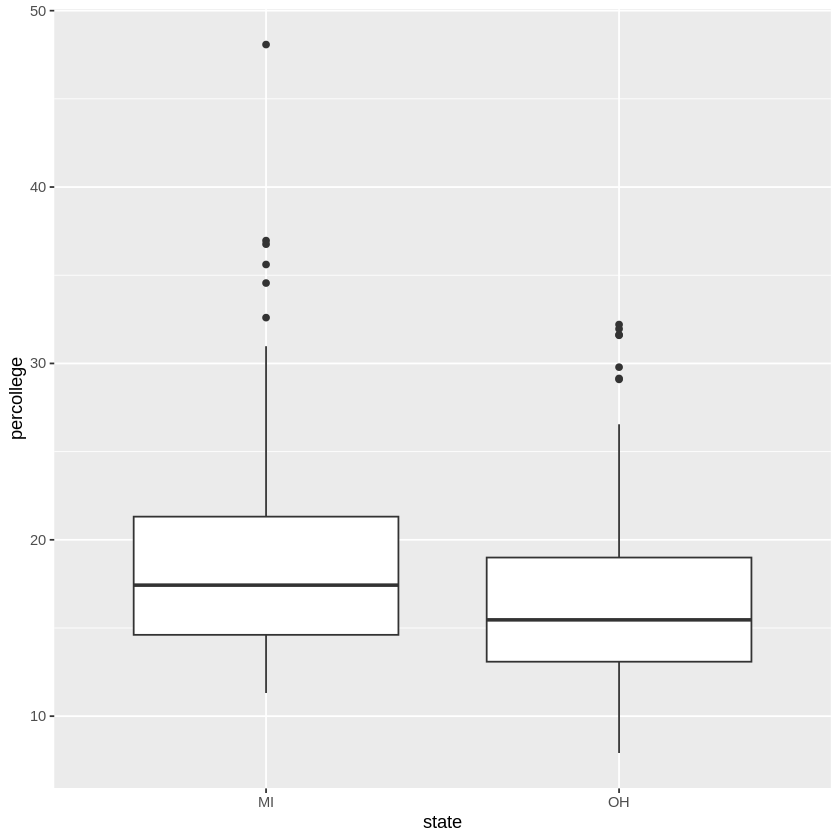

In [ ]:
# Box-plot:
ggplot(filter_df, aes(state, percollege)) + geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


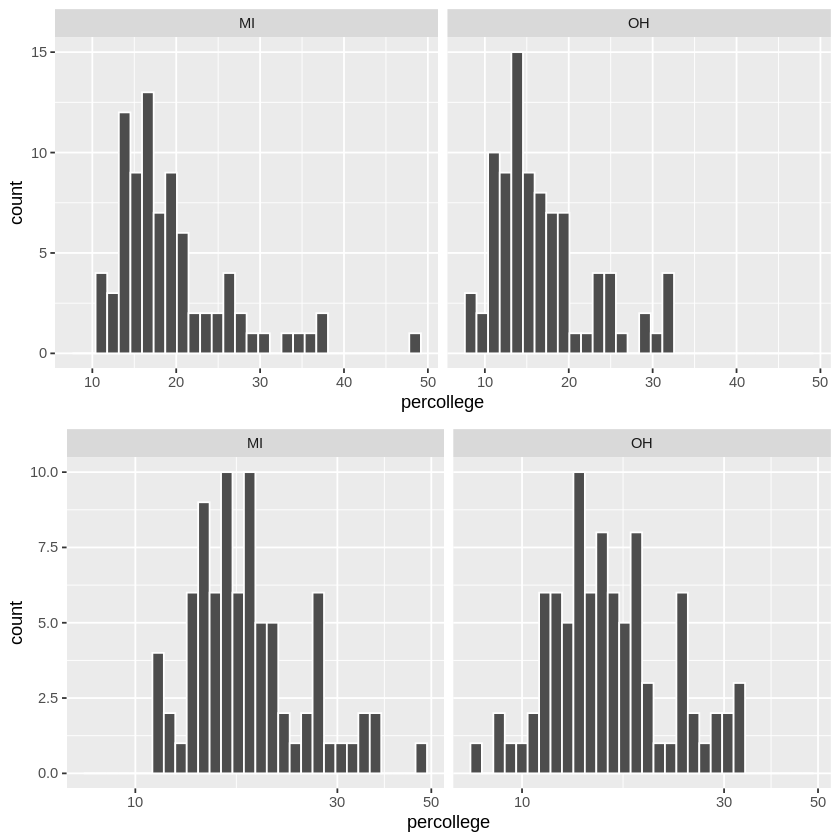

In [ ]:
# Histogram
p1 <- ggplot(filter_df, aes(percollege)) + geom_histogram(fill="grey30", color="white") + facet_wrap(~ state)
p2 <- ggplot(filter_df, aes(percollege)) + geom_histogram(fill="grey30", color="white") + facet_wrap(~ state) + scale_x_log10()
grid.arrange(p1, p2, nrow=2)

In [ ]:
# Test with original data
head(filter_df)
unique(filter_df$state)

state,percollege
<chr>,<dbl>
MI,14.11509
MI,16.27559
MI,18.06602
MI,18.93380
MI,19.03980
MI,11.82785


[1] "MI" "OH"

In [ ]:
t.test(percollege ~ state, data=filter_df)


	Welch Two Sample t-test

data:  percollege by state
t = 2.5953, df = 161.27, p-value = 0.01032
alternative hypothesis: true difference in means between group MI and group OH is not equal to 0
95 percent confidence interval:
 0.6051571 4.4568579
sample estimates:
mean in group MI mean in group OH 
        19.42146         16.89045 


In [ ]:
# Test with log transform data
t.test(log(percollege) ~ state, data=filter_df)


	Welch Two Sample t-test

data:  log(percollege) by state
t = 2.9556, df = 168.98, p-value = 0.003567
alternative hypothesis: true difference in means between group MI and group OH is not equal to 0
95 percent confidence interval:
 0.04724892 0.23732151
sample estimates:
mean in group MI mean in group OH 
        2.915873         2.773587 


## Mann-Whitney U test:
- Non-parametric alternative to two independent samples mean t-test

In [ ]:
wilcox.test(percollege ~ state, data=filter_df)


	Wilcoxon rank sum test with continuity correction

data:  percollege by state
W = 4618, p-value = 0.002845
alternative hypothesis: true location shift is not equal to 0


# Paired Sample T-Test

In [ ]:
data(sleep)	# Built-in data from ggplot2
head(sleep)
dim(sleep)
length(unique(sleep$group))

,extra,group,ID
,<dbl>,<fct>,<fct>
1,0.7,1,1
2,-1.6,1,2
3,-0.2,1,3
4,-1.2,1,4
5,-0.1,1,5
6,3.4,1,6


[1] 20  3

[1] 2

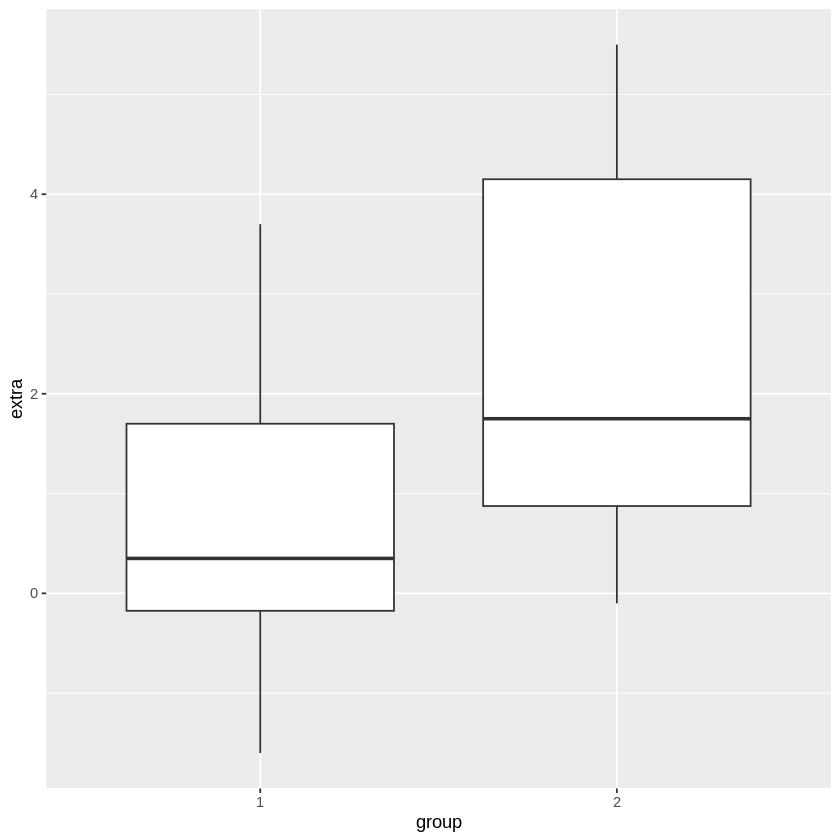

In [ ]:
ggplot(sleep, aes(group, extra)) + geom_boxplot()

In [ ]:
## Paired T-test
t.test(extra ~ group, data=sleep, paired = TRUE)


	Paired t-test

data:  extra by group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean difference 
          -1.58 


## Paired Samples: Wilcoxon Test

In [ ]:
#Weight of the mice before treatment
before <- c(200.1, 190.9, 192.7, 213, 241.4, 196.9, 	172.2, 185.5, 205.2, 193.7)

#Weight of the mice after treatment
after <- c(392.9, 393.2, 345.1, 393, 434, 427.9, 	422, 	383.9, 392.3, 352.2)

In [ ]:
res <- wilcox.test(before, after, paired = TRUE)
res


	Wilcoxon signed rank exact test

data:  before and after
V = 0, p-value = 0.001953
alternative hypothesis: true location shift is not equal to 0
